# Matplotlib format charts

In [ ]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import datetime as dt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

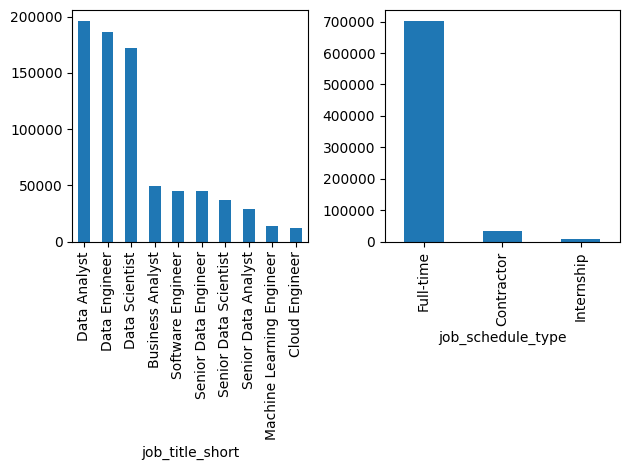

In [5]:
# Subplots
fig, ax = plt.subplots(1, 2)
df['job_title_short'].value_counts().plot(kind = 'bar', ax = ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind = 'bar', ax = ax[1])
plt.tight_layout()

# Alternatively use ax[0].plot(index, values)



In [13]:
# Subplots for DS, DE and DA

df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count= df_skills.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by = 'skill_count', ascending = False, inplace=True)

display(df_skills_count)


,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


     job_title_short job_skills  skill_count
1066  Data Scientist     python       113711
1101  Data Scientist        sql        78982
1070  Data Scientist          r        59566
1082  Data Scientist        sas        29534
1113  Data Scientist    tableau        29445
    job_title_short job_skills  skill_count
865   Data Engineer        sql       113130
830   Data Engineer     python       108022
686   Data Engineer        aws        62049
687   Data Engineer      azure        60674
860   Data Engineer      spark        53656
    job_title_short job_skills  skill_count
625    Data Analyst        sql        92428
494    Data Analyst      excel        66860
590    Data Analyst     python        57190
638    Data Analyst    tableau        46455
583    Data Analyst   power bi        39380


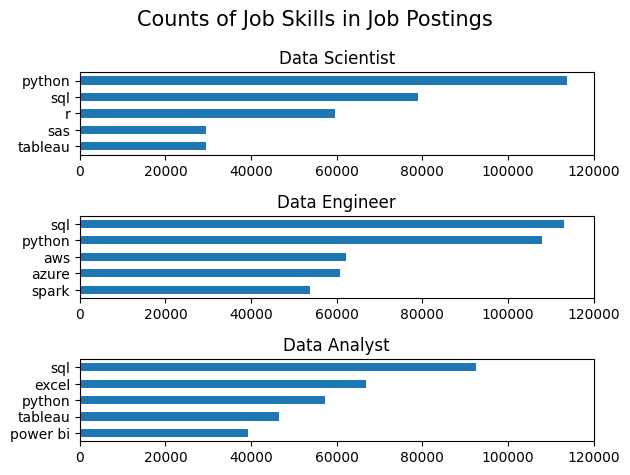

In [28]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    print(df_skills_count[df_skills_count['job_title_short'] == job_title].head(5))
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title)
    ax[i].invert_yaxis() # specify axes, methods need set_whatever
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False) 
    ax[i].set_xlim(0, 120000) #xlim determines scale


fig.suptitle('Counts of Job Skills in Job Postings', fontsize = 15)
fig.tight_layout()


    
